In [5]:
import numpy as np

def summation(inputs, weights):
    """
    Calculate weighted sum of inputs + bias.
    inputs: numpy array of input features
    weights: numpy array of weights (including bias)
    """
    return np.dot(inputs, weights)

# Activation functions
def step(x):
    """Step Activation Function"""
    return 1 if x >= 0 else 0

def bipolar_step(x):
    """Bi-Polar Step Activation Function"""
    return 1 if x >= 0 else -1

def sigmoid(x):
    """Sigmoid Activation Function"""
    return 1 / (1 + np.exp(-x))

def tanh_act(x):
    """Hyperbolic Tangent Activation Function"""
    return np.tanh(x)

def relu(x):
    """ReLU Activation Function"""
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    """Leaky ReLU Activation Function"""
    return x if x > 0 else alpha * x


def calculate_error(y_true, y_pred):
    """
    Calculate prediction error
    y_true: expected output
    y_pred: predicted output
    """
    return y_true - y_pred

if __name__ == "__main__":
    # Example Inputs
    inputs = np.array([1, 0, 1])   # bias + inputs
    weights = np.array([0.5, -0.2, 0.3])

    # Test Summation
    net = summation(inputs, weights)
    print("Summation Output:", net)

    # Test Activation Functions
    print("Step:", step(net))
    print("Bipolar Step:", bipolar_step(net))
    print("Sigmoid:", sigmoid(net))
    print("Tanh:", tanh_act(net))
    print("ReLU:", relu(net))
    print("Leaky ReLU:", leaky_relu(net))

    # Test Error Comparator
    y_true, y_pred = 1, step(net)
    print("Error:", calculate_error(y_true, y_pred))


Summation Output: 0.8
Step: 1
Bipolar Step: 1
Sigmoid: 0.6899744811276125
Tanh: 0.664036770267849
ReLU: 0.8
Leaky ReLU: 0.8
Error: 0


Final Weights: [-0.1   0.1   0.05]
Converged in: 130 epochs


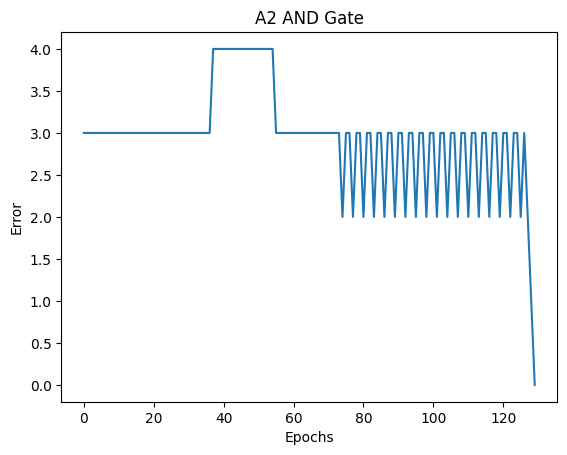

In [6]:
import matplotlib.pyplot as plt

def train_perceptron(X, y, weights, lr=0.05, max_epochs=1000, tol=0.002, activation=step):
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            net = summation(X[i], weights)
            y_pred = activation(net)
            error = calculate_error(y[i], y_pred)
            weights += lr * error * X[i]
            total_error += error**2
        errors.append(total_error)
        if total_error <= tol:
            break
    return weights, errors, epoch+1

if __name__ == "__main__":
    X = np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])  # bias+inputs
    y = np.array([0,0,0,1])
    weights = np.array([10,0.2,-0.75])
    final_weights, errors, epochs = train_perceptron(X, y, weights, lr=0.05)
    print("Final Weights:", final_weights)
    print("Converged in:", epochs, "epochs")
    plt.plot(errors); plt.xlabel("Epochs"); plt.ylabel("Error"); plt.title("A2 AND Gate"); plt.show()


Bipolar Step → Epochs: 1000, Final Weights: [-0.1   0.1   0.05]
Sigmoid → Epochs: 1000, Final Weights: [-6.13531308  3.97083321  3.96394835]
ReLU → Epochs: 390, Final Weights: [-0.92774472  0.95116001  0.94981086]


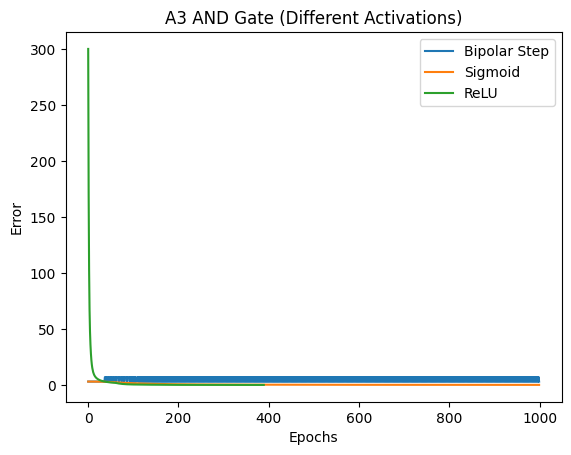

In [7]:
activations = {"Bipolar Step": bipolar_step, "Sigmoid": sigmoid, "ReLU": relu}

for name, act in activations.items():
    weights = np.array([10,0.2,-0.75])
    final_w, errors, epochs = train_perceptron(X, y, weights, lr=0.05, activation=act)
    print(f"{name} → Epochs: {epochs}, Final Weights: {final_w}")
    plt.plot(errors, label=name)

plt.legend(); plt.xlabel("Epochs"); plt.ylabel("Error"); plt.title("A3 AND Gate (Different Activations)"); plt.show()

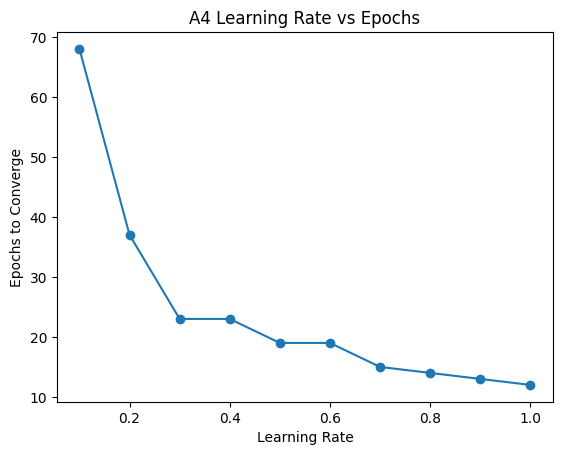

In [8]:
learning_rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
epochs_list = []

for lr in learning_rates:
    weights = np.array([10,0.2,-0.75])
    _, _, epochs = train_perceptron(X, y, weights, lr=lr)
    epochs_list.append(epochs)

plt.plot(learning_rates, epochs_list, marker="o")
plt.xlabel("Learning Rate"); plt.ylabel("Epochs to Converge"); plt.title("A4 Learning Rate vs Epochs"); plt.show()

XOR Perceptron → Final Weights: [ 0.1 -0.1 -0.1] Epochs: 1000


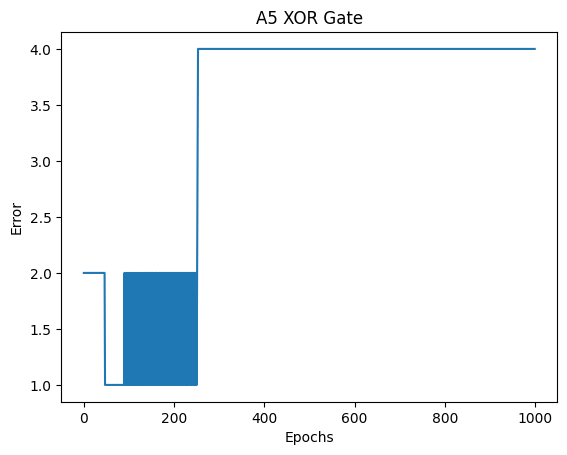

In [9]:
X_xor = np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y_xor = np.array([0,1,1,0])

weights = np.array([10,0.2,-0.75])
final_w, errors, epochs = train_perceptron(X_xor, y_xor, weights, lr=0.05)
print("XOR Perceptron → Final Weights:", final_w, "Epochs:", epochs)
plt.plot(errors); plt.xlabel("Epochs"); plt.ylabel("Error"); plt.title("A5 XOR Gate"); plt.show()

In [10]:
import pandas as pd

# Use given small dataset or your listings.csv
data = pd.DataFrame({
 "Candies":[20,16,27,19,24,22,15,18,21,16],
 "Mangoes":[6,3,6,1,4,1,4,4,1,2],
 "Milk":[2,6,2,2,2,5,2,2,4,4],
 "Payment":[386,289,393,110,280,167,271,274,148,198],
 "High":[1,1,1,0,1,0,1,1,0,0]
})

X_cust = np.c_[np.ones(len(data)), data[["Candies","Mangoes","Milk","Payment"]].values]
y_cust = data["High"].values

weights = np.random.rand(X_cust.shape[1])
final_w, errors, epochs = train_perceptron(X_cust, y_cust, weights, lr=0.05, activation=sigmoid)
print("Customer Perceptron Weights:", final_w)

Customer Perceptron Weights: [ -18.61842956 -270.40344157   41.48933368 -108.01387736   23.6601935 ]


/tmp/ipython-input-2154296746.py:25: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [11]:
X_pinv = X_cust
y_pinv = y_cust.reshape(-1,1)
weights_pinv = np.linalg.pinv(X_pinv).dot(y_pinv)
print("Pseudo-inverse weights:\n", weights_pinv.ravel())

Pseudo-inverse weights:
 [ 0.1139903  -0.02789923  0.01473739 -0.04323249  0.00447248]


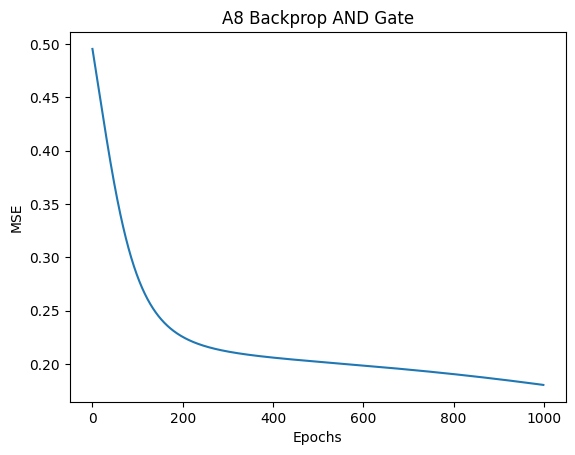

In [12]:
def sigmoid_derivative(x): return sigmoid(x)*(1-sigmoid(x))

def train_backprop(X, y, hidden_neurons=2, lr=0.05, max_epochs=1000, tol=0.002):
    np.random.seed(42)
    input_neurons = X.shape[1]
    output_neurons = 1
    W1 = np.random.randn(input_neurons, hidden_neurons)
    W2 = np.random.randn(hidden_neurons, output_neurons)
    errors = []
    for epoch in range(max_epochs):
        hidden_in = X.dot(W1)
        hidden_out = sigmoid(hidden_in)
        final_in = hidden_out.dot(W2)
        final_out = sigmoid(final_in)
        error = y - final_out.ravel()
        errors.append(np.mean(error**2))
        if np.mean(error**2) <= tol: break
        d_final = error[:,None]*sigmoid_derivative(final_in)
        d_hidden = d_final.dot(W2.T)*sigmoid_derivative(hidden_in)
        W2 += lr*hidden_out.T.dot(d_final)
        W1 += lr*X.T.dot(d_hidden)
    return W1, W2, errors

X_and = X
y_and = y
W1, W2, errors = train_backprop(X_and, y_and)
plt.plot(errors); plt.xlabel("Epochs"); plt.ylabel("MSE"); plt.title("A8 Backprop AND Gate"); plt.show()

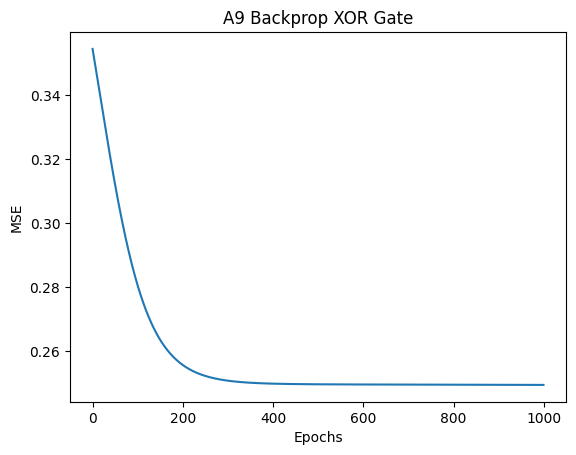

In [13]:
W1, W2, errors = train_backprop(X_xor, y_xor)
plt.plot(errors); plt.xlabel("Epochs"); plt.ylabel("MSE"); plt.title("A9 Backprop XOR Gate"); plt.show()

Final W1: [[ 2.12312101 -0.36552646]
 [-1.62889849  1.92329355]
 [-2.07954315  0.00801962]]
Final W2: [[ 3.51003522 -2.61806344]
 [-1.25001431  0.63083879]]


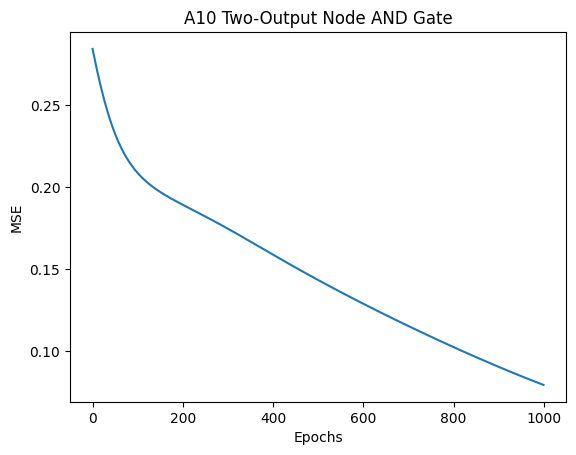

In [20]:
def train_backprop_multi(X, y, hidden_neurons=2, lr=0.05, max_epochs=1000, tol=0.002):
    np.random.seed(42)
    input_neurons = X.shape[1]
    output_neurons = y.shape[1]   # multiple outputs
    W1 = np.random.randn(input_neurons, hidden_neurons)
    W2 = np.random.randn(hidden_neurons, output_neurons)

    errors = []
    for epoch in range(max_epochs):
        # Forward pass
        hidden_in = X.dot(W1)
        hidden_out = sigmoid(hidden_in)

        final_in = hidden_out.dot(W2)
        final_out = sigmoid(final_in)

        # Error calculation
        error = y - final_out
        mse = np.mean(np.square(error))
        errors.append(mse)

        if mse <= tol:
            break

        # Backpropagation
        d_final = error * (final_out * (1 - final_out))   # sigmoid derivative
        d_hidden = d_final.dot(W2.T) * (hidden_out * (1 - hidden_out))

        # Weight updates
        W2 += lr * hidden_out.T.dot(d_final)
        W1 += lr * X.T.dot(d_hidden)

    return W1, W2, errors
# A10: Two-output encoding for AND gate
if __name__ == "__main__":
    X_and = np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])  # bias + inputs
    y_and = np.array([0,0,0,1])

    # Encode outputs: 0 → [1,0], 1 → [0,1]
    y_and_encoded = np.array([[1,0] if v==0 else [0,1] for v in y_and])

    W1, W2, errors = train_backprop_multi(X_and, y_and_encoded)

    print("Final W1:", W1)
    print("Final W2:", W2)

    import matplotlib.pyplot as plt
    plt.plot(errors)
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.title("A10 Two-Output Node AND Gate")
    plt.show()


In [16]:
from sklearn.neural_network import MLPClassifier

clf_and = MLPClassifier(hidden_layer_sizes=(2,), activation="logistic", max_iter=1000)
clf_and.fit(X[:,1:], y)  # exclude bias column
print("A11 AND Predictions:", clf_and.predict(X[:,1:]))

clf_xor = MLPClassifier(hidden_layer_sizes=(2,), activation="logistic", max_iter=1000)
clf_xor.fit(X_xor[:,1:], y_xor)
print("A11 XOR Predictions:", clf_xor.predict(X_xor[:,1:]))

A11 AND Predictions: [0 0 0 0]
A11 XOR Predictions: [1 1 1 1]


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
# Example: preprocess your dataset
df = pd.read_csv("/content/listings.csv")

# Select some numeric features (adjust according to your file structure)
features = df.select_dtypes(include=[np.number]).dropna(axis=1).iloc[:,:5]  # take first 5 numeric cols
labels = (features.iloc[:,0] > features.iloc[:,0].median()).astype(int)     # dummy label (high/low)

X_proj = features.values
y_proj = labels.values

clf_proj = MLPClassifier(hidden_layer_sizes=(10,), activation="relu", max_iter=1000)
clf_proj.fit(X_proj, y_proj)
print("A12 Project Dataset Accuracy:", clf_proj.score(X_proj, y_proj))

A12 Project Dataset Accuracy: 0.7102582456913166
